In [ ]:
pip install researchpy

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from imblearn.combine import SMOTETomek
from collections import Counter
import researchpy as rp
from imblearn.over_sampling import ADASYN
import warnings

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


# Reading the dataset

In [ ]:
df=pd.read_csv('diabetes.csv',keep_default_na=False, na_values=[""])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# Exploring the data

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Statistical and Consistency Analysis

In [ ]:
df_0 = df[df["Outcome"] == 0]
df_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [ ]:
rp.summary_cont(df_0)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Pregnancies,500.0,3.2980,3.0172,0.1349,3.0329,3.5631
1,Glucose,500.0,109.9800,26.1412,1.1691,107.6831,112.2769
2,BloodPressure,500.0,68.1840,18.0631,0.8078,66.5969,69.7711
3,SkinThickness,500.0,19.6640,14.8899,0.6659,18.3557,20.9723
4,Insulin,500.0,68.7920,98.8653,4.4214,60.1052,77.4788
5,BMI,500.0,30.3042,7.6899,0.3439,29.6285,30.9799
6,DiabetesPedigreeFunction,500.0,0.4297,0.2991,0.0134,0.4035,0.4560
7,Age,500.0,31.1900,11.6677,0.5218,30.1648,32.2152
8,Outcome,500.0,0.0000,0.0000,0.0000,NaN,NaN


In [ ]:
np.var(df_0)

Pregnancies                    9.085196
Glucose                      681.995600
BloodPressure                325.622144
SkinThickness                221.267104
Insulin                     9754.796736
BMI                           59.015602
DiabetesPedigreeFunction       0.089273
Age                          135.861900
Outcome                        0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_0)

array([ 1.11075999,  0.17259135, -1.80439066,  0.03106169,  2.49123855,
       -0.66390267,  2.00021791,  1.5668906 ,  0.        ])

In [ ]:
df_1 = df[df["Outcome"] == 1]
df_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [ ]:
rp.summary_cont(df_1)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Pregnancies,268.0,4.8657,3.7412,0.2285,4.4157,5.3156
1,Glucose,268.0,141.2575,31.9396,1.9510,137.4161,145.0988
2,BloodPressure,268.0,70.8246,21.4918,1.3128,68.2398,73.4094
3,SkinThickness,268.0,22.1642,17.6797,1.0800,20.0379,24.2905
4,Insulin,268.0,100.3358,138.6891,8.4718,83.6558,117.0158
5,BMI,268.0,35.1425,7.2630,0.4437,34.2690,36.0160
6,DiabetesPedigreeFunction,268.0,0.5505,0.3724,0.0227,0.5057,0.5953
7,Age,268.0,37.0672,10.9683,0.6700,35.7480,38.3863
8,Outcome,268.0,1.0000,0.0000,0.0000,NaN,NaN


In [ ]:
np.var(df_1)

Pregnancies                    13.944642
Glucose                      1016.332967
BloodPressure                 460.174468
SkinThickness                 311.405881
Insulin                     19162.902150
BMI                            52.553862
DiabetesPedigreeFunction        0.138131
Age                           119.853698
Outcome                         0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_1)

array([ 5.00925330e-01, -4.92779129e-01, -1.93273775e+00,  1.15259759e-01,
        1.83349545e+00,  5.93487277e-04,  1.71271794e+00,  5.78385316e-01,
        0.00000000e+00])

# A significant difference is present between classes 0 and 1. Hence, it can be attributed as an imbalanced dataset.

# Plotting of data points for all the 6 combinations of four random feature variables which are Glucose, BloodPressure, BMI, DiabetesPedigreeFunction, in order to visualise overlapping.

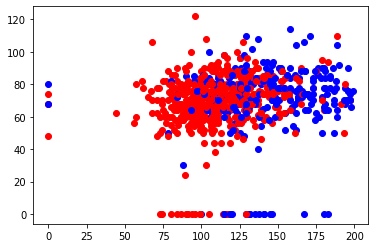

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,1]
  x2=df.iloc[i,2]
  x3=df.iloc[i,5]
  x4=df.iloc[i,6]
  y=df.iloc[i,8]
  if(y==0):
    plt.scatter(x1,x2,color='red')
  else:
    plt.scatter(x1,x2,color='blue')
plt.show()

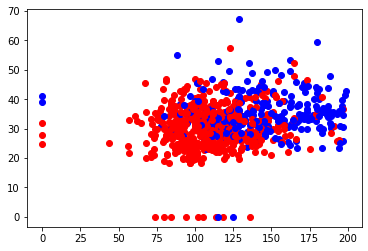

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,1]
  x2=df.iloc[i,2]
  x3=df.iloc[i,5]
  x4=df.iloc[i,6]
  y=df.iloc[i,8]
  if(y==0):
    plt.scatter(x1,x3,color='red')
  else:
    plt.scatter(x1,x3,color='blue')
plt.show()

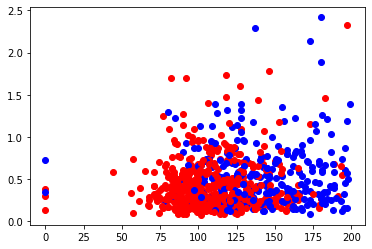

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,1]
  x2=df.iloc[i,2]
  x3=df.iloc[i,5]
  x4=df.iloc[i,6]
  y=df.iloc[i,8]
  if(y==0):
    plt.scatter(x1,x4,color='red')
  else:
    plt.scatter(x1,x4,color='blue')
plt.show()

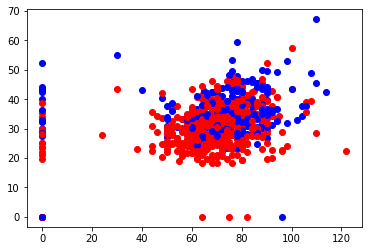

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,1]
  x2=df.iloc[i,2]
  x3=df.iloc[i,5]
  x4=df.iloc[i,6]
  y=df.iloc[i,8]
  if(y==0):
    plt.scatter(x2,x3,color='red')
  else:
    plt.scatter(x2,x3,color='blue')
plt.show()

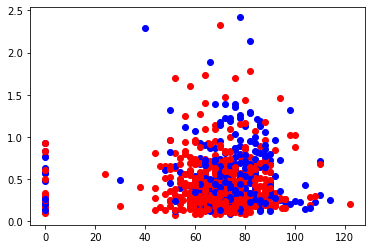

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,1]
  x2=df.iloc[i,2]
  x3=df.iloc[i,5]
  x4=df.iloc[i,6]
  y=df.iloc[i,8]
  if(y==0):
    plt.scatter(x2,x4,color='red')
  else:
    plt.scatter(x2,x4,color='blue')
plt.show()

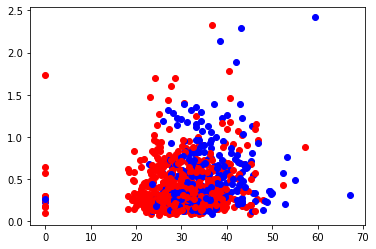

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,1]
  x2=df.iloc[i,2]
  x3=df.iloc[i,5]
  x4=df.iloc[i,6]
  y=df.iloc[i,8]
  if(y==0):
    plt.scatter(x3,x4,color='red')
  else:
    plt.scatter(x3,x4,color='blue')
plt.show()

# Hence, it can be confirmed from the above scatter plots that all of the six randomly selected features, hence all other features, overlap with one another as expected.

# Data Splicing

In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# Decision Tree Clasiifier

In [ ]:
warnings.filterwarnings('ignore')
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train,y_train)
y_pred = tree_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(tree, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(tree, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.682

Confusion Matrix : 
 [[97 26]
 [35 34]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       123
           1       0.57      0.49      0.53        69

    accuracy                           0.68       192
   macro avg       0.65      0.64      0.64       192
weighted avg       0.67      0.68      0.68       192


Accuracy using 10 fold Cross validation =  0.7101028433151846

Precision using 10 fold Cross validation =  0.5645603182793585

Recall using 10 fold Cross validation =  0.5676315789473684


# KNN Classifier

In [ ]:
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier(n_neighbors = 3)
knn_fit = knn.fit(x_train,y_train)
y_pred = knn_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(knn, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.740

Confusion Matrix : 
 [[101  22]
 [ 28  41]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       123
           1       0.65      0.59      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192


Accuracy using 10 fold Cross validation =  0.6907743496672716

Precision using 10 fold Cross validation =  0.567837123260969

Recall using 10 fold Cross validation =  0.5176315789473684


# SVM Classifier

In [ ]:
warnings.filterwarnings('ignore')
mod = SVC()
mod_fit = mod.fit(x_train,y_train)
y_pred = mod_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(mod, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(mod, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(mod, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.771

Confusion Matrix : 
 [[113  10]
 [ 34  35]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       123
           1       0.78      0.51      0.61        69

    accuracy                           0.77       192
   macro avg       0.77      0.71      0.73       192
weighted avg       0.77      0.77      0.76       192


Accuracy using 10 fold Cross validation =  0.7534785238959467

Precision using 10 fold Cross validation =  0.7300339937839937

Recall using 10 fold Cross validation =  0.46236842105263154


# Logistic Regression

In [ ]:
warnings.filterwarnings('ignore')
log=LogisticRegression()
log_fit = log.fit(x_train,y_train)
log.score(x_test,y_test)
y_pred=log_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(log, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(log, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(log, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.776

Confusion Matrix : 
 [[109  14]
 [ 29  40]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192


Accuracy using 10 fold Cross validation =  0.7604355716878403

Precision using 10 fold Cross validation =  0.7023517624446417

Recall using 10 fold Cross validation =  0.5523684210526316


# Random Forest

In [ ]:
warnings.filterwarnings('ignore')
ran=RandomForestClassifier()
ran_fit = ran.fit(x_train,y_train)
y_pred=ran_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(ran, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(ran, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(ran, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.802

Confusion Matrix : 
 [[106  17]
 [ 21  48]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       123
           1       0.74      0.70      0.72        69

    accuracy                           0.80       192
   macro avg       0.79      0.78      0.78       192
weighted avg       0.80      0.80      0.80       192


Accuracy using 10 fold Cross validation =  0.7428312159709619

Precision using 10 fold Cross validation =  0.6803468182144654

Recall using 10 fold Cross validation =  0.5371052631578948


# Resampling using SMOTETomek

In [ ]:
warnings.filterwarnings('ignore')
os=SMOTETomek(0.75, random_state=1)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The classes before fitCounter({0: 377, 1: 199})
The number of classes after fitCounter({0: 345, 1: 250})


In [ ]:
#os=SMOTETomek(random_state=1)
#x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 377, 1: 199})
The number of classes after fit Counter({0: 345, 1: 250})


In [ ]:
x_train_ns.size

4760

In [ ]:
y_train_ns.size

595

# Decision Tree after resampling

In [ ]:
warnings.filterwarnings('ignore')
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train_ns,y_train_ns)
y_pred = tree_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(tree, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(tree, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(tree, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.792

Confusion Matrix : 
 [[104  19]
 [ 21  48]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.72      0.70      0.71        69

    accuracy                           0.79       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.79      0.79      0.79       192


Accuracy using 10 fold Cross validation =  0.7701412429378531

Precision using 10 fold Cross validation =  0.7401817670353508

Recall using 10 fold Cross validation =  0.728


# KNN after resampling

In [ ]:
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier(n_neighbors = 3)
knn_fit = knn.fit(x_train_ns,y_train_ns)
y_pred = knn_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(knn, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(knn, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(knn, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.750

Confusion Matrix : 
 [[94 29]
 [19 50]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.76      0.80       123
           1       0.63      0.72      0.68        69

    accuracy                           0.75       192
   macro avg       0.73      0.74      0.74       192
weighted avg       0.76      0.75      0.75       192


Accuracy using 10 fold Cross validation =  0.7295197740112994

Precision using 10 fold Cross validation =  0.6624997676694007

Recall using 10 fold Cross validation =  0.728


# SVM after resampling

In [ ]:
warnings.filterwarnings('ignore')
mod = SVC()
mod_fit = mod.fit(x_train_ns,y_train_ns)
y_pred = mod_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(mod, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(mod, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(mod, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.766

Confusion Matrix : 
 [[106  17]
 [ 28  41]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       123
           1       0.71      0.59      0.65        69

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.76      0.77      0.76       192


Accuracy using 10 fold Cross validation =  0.7612994350282486

Precision using 10 fold Cross validation =  0.7763732577491159

Recall using 10 fold Cross validation =  0.616


# Logistic Regression after resampling

In [ ]:
warnings.filterwarnings('ignore')
log=LogisticRegression()
log_fit = log.fit(x_train_ns,y_train_ns)
log.score(x_test,y_test)
y_pred=log_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(log, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(log, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(log, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.771

Confusion Matrix : 
 [[104  19]
 [ 25  44]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       123
           1       0.70      0.64      0.67        69

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.75       192
weighted avg       0.77      0.77      0.77       192


Accuracy using 10 fold Cross validation =  0.7681073446327684

Precision using 10 fold Cross validation =  0.7616832298136647

Recall using 10 fold Cross validation =  0.6639999999999999


# Random Forest after resamling

In [ ]:
warnings.filterwarnings('ignore')
ran=RandomForestClassifier()
ran_fit = ran.fit(x_train_ns,y_train_ns)
y_pred=ran_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(ran, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(ran, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(ran, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.812

Confusion Matrix : 
 [[108  15]
 [ 21  48]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       123
           1       0.76      0.70      0.73        69

    accuracy                           0.81       192
   macro avg       0.80      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192


Accuracy using 10 fold Cross validation =  0.82545197740113

Precision using 10 fold Cross validation =  0.806768877105459

Recall using 10 fold Cross validation =  0.76
